In [2]:

import deepxde as dde
from deepxde.backend import tf
import numpy as np

In [3]:
from time import time

def gen_testdata():
    data = np.load("Burgers.npz")
    t, x, exact = data["t"], data["x"], data["usol"].T
    xx, tt = np.meshgrid(x, t)
    X = np.vstack((np.ravel(xx), np.ravel(tt))).T
    y = exact.flatten()[:, None]
    return X, y

geom= dde.geometry.Interval(-1,1)
timedomain = dde.geometry.TimeDomain(0,1.00)
geotime = dde.geometry.GeometryXTime(geom,timedomain)

def pde(x,y):
    dy_x = dde.grad.jacobian(y,x,i=0,j=0)
    dy_t = dde.grad.jacobian(y,x,i=0,j=1)
    dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    return dy_t + y*dy_x -(0.01)*dy_xx

bc = dde.icbc.DirichletBC(geotime,lambda x: 0, lambda _,on_boundary:on_boundary)
ic = dde.icbc.IC(geotime,lambda x:-np.sin(np.pi*x[:,0:1]),lambda _,on_initial:on_initial)

data = dde.data.TimePDE(geotime,pde,[bc,ic],num_domain=2540,num_boundary=80,num_initial=160)

net = dde.nn.FNN([2]+[50]*3 +[1],'tanh','Glorot normal')

model = dde.Model(data,net)
model.compile('adam',lr=0.003)
losshistory, train_state = model.train(iterations=40000)

Compiling model...
Building feed-forward neural network...
'build' took 0.093524 s



/home/diganta/anaconda3/envs/ML/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2022-11-24 19:00:47.595184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 0.947108 s

Initializing variables...
Training model...



2022-11-24 19:00:48.457381: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Step      Train loss                        Test loss                         Test metric
0         [3.02e-02, 1.79e-02, 5.76e-01]    [3.02e-02, 1.79e-02, 5.76e-01]    []  
1000      [8.63e-03, 1.93e-04, 1.22e-02]    [8.63e-03, 1.93e-04, 1.22e-02]    []  
2000      [1.41e-03, 1.20e-05, 7.72e-04]    [1.41e-03, 1.20e-05, 7.72e-04]    []  
3000      [4.79e-04, 5.47e-06, 2.26e-04]    [4.79e-04, 5.47e-06, 2.26e-04]    []  
4000      [3.93e-04, 4.29e-06, 1.36e-04]    [3.93e-04, 4.29e-06, 1.36e-04]    []  
5000      [2.45e-04, 1.77e-06, 8.52e-05]    [2.45e-04, 1.77e-06, 8.52e-05]    []  
6000      [7.27e-04, 5.41e-04, 3.68e-04]    [7.27e-04, 5.41e-04, 3.68e-04]    []  
7000      [3.01e-03, 3.43e-04, 2.48e-04]    [3.01e-03, 3.43e-04, 2.48e-04]    []  
8000      [1.53e-04, 2.16e-05, 3.40e-05]    [1.53e-04, 2.16e-05, 3.40e-05]    []  
9000      [1.07e-04, 9.49e-07, 1.85e-05]    [1.07e-04, 9.49e-07, 1.85e-05]    []  
10000     [1.74e-03, 3.59e-05, 1.16e-04]    [1.74e-03, 3.59e-05, 1.16e-04]    []

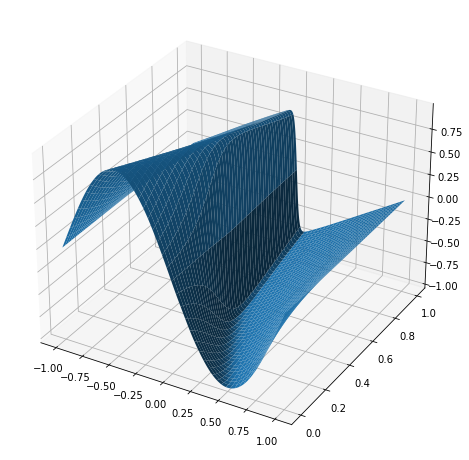

In [6]:
import matplotlib.pyplot as plt
X,y_true = gen_testdata()

t=np.linspace(0.0,1.0,1000)
x=np.linspace(-1.0,1.0,1000)
xx, tt = np.meshgrid(x, t)
#X = np.vstack((np.ravel(xx), np.ravel(tt))).T
#y_pred = model.predict(X)
#f = model.predict(X)
X=np.concatenate([xx.reshape(1000,1000,1),tt.reshape(1000,1000,1)],axis=2)

f = model.predict(X.reshape((1000000,2)))
plt.figure(figsize=(8,10))
ax=plt.axes(projection='3d')
ax.plot_surface(xx,tt,f.reshape(1000,1000))
plt.show()

<module 'matplotlib.pyplot' from '/home/diganta/anaconda3/envs/ML/lib/python3.8/site-packages/matplotlib/pyplot.py'>

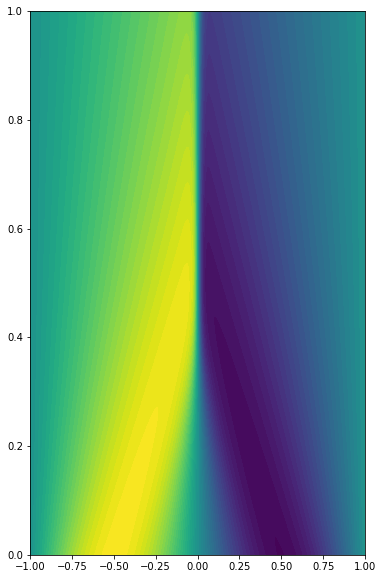

In [7]:
plt.figure(figsize=(6,10))
plt.contourf(xx,tt,f.reshape([1000,1000]),50)



In [9]:
from time import time

def gen_testdata():
    data = np.load("Burgers.npz")
    t, x, exact = data["t"], data["x"], data["usol"].T
    xx, tt = np.meshgrid(x, t)
    X = np.vstack((np.ravel(xx), np.ravel(tt))).T
    y = exact.flatten()[:, None]
    return X, y

geom= dde.geometry.Interval(-1,1)
timedomain = dde.geometry.TimeDomain(0,5.00)
geotime = dde.geometry.GeometryXTime(geom,timedomain)

def pde(x,y):
    dy_x = dde.grad.jacobian(y,x,i=0,j=0)
    dy_t = dde.grad.jacobian(y,x,i=0,j=1)
    #dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    return dy_t + y*dy_x #-(0.01)*dy_xx

bc = dde.icbc.DirichletBC(geotime,lambda x: 0, lambda _,on_boundary:on_boundary)
ic = dde.icbc.IC(geotime,lambda x:-np.sin(np.pi*x[:,0:1]),lambda _,on_initial:on_initial)

data = dde.data.TimePDE(geotime,pde,[bc,ic],num_domain=2540,num_boundary=80,num_initial=160)

net = dde.nn.FNN([2]+[50]*3 +[1],'tanh','Glorot normal')

model = dde.Model(data,net)
model.compile("L-BFGS")
losshistory, train_state = model.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.108872 s

'compile' took 0.512119 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.31e-01, 1.08e+00, 4.86e-01]    [1.31e-01, 1.08e+00, 4.86e-01]    []  
1000      [3.74e-02, 5.77e-06, 9.19e-03]                                          
2000      [1.28e-02, 1.36e-04, 1.72e-03]                                          
3000      [6.00e-03, 1.56e-05, 4.43e-04]                                          
4000      [4.44e-03, 1.28e-05, 1.58e-04]                                          
5000      [3.64e-03, 6.97e-06, 6.68e-05]                                          
6000      [2.60e-03, 2.03e-05, 6.67e-05]                                          
7000      [1.94e-03, 7.29e-06, 3.58e-05]                                          
8000      [1.24e-03, 9.97e-06, 4.01e-05]                                          
9000   

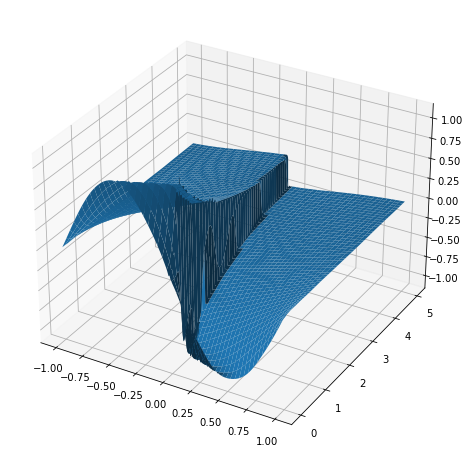

In [10]:
import matplotlib.pyplot as plt
X,y_true = gen_testdata()

t=np.linspace(0.0,5.0,1000)
x=np.linspace(-1.0,1.0,1000)
xx, tt = np.meshgrid(x, t)
#X = np.vstack((np.ravel(xx), np.ravel(tt))).T
#y_pred = model.predict(X)
#f = model.predict(X)
X=np.concatenate([xx.reshape(1000,1000,1),tt.reshape(1000,1000,1)],axis=2)

f = model.predict(X.reshape((1000000,2)))
plt.figure(figsize=(8,10))
ax=plt.axes(projection='3d')
ax.plot_surface(xx,tt,f.reshape(1000,1000))
plt.show()

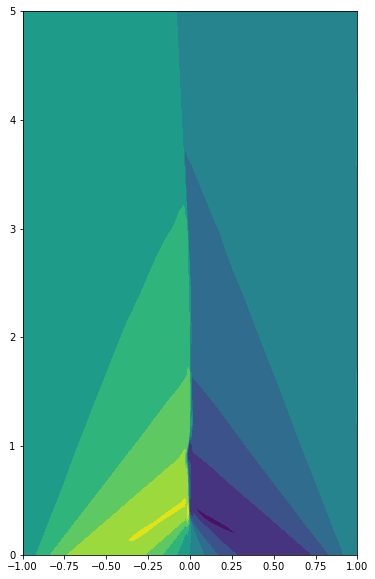

In [12]:
plt.figure(figsize=(6,10))
plt.contourf(xx,tt,f.reshape([1000,1000]),10)